In [27]:
import numpy as np
from math import sqrt
from pprint import pprint
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model, metrics

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, train_test_split, cross_val_score

from sklearn.metrics import make_scorer, mean_squared_error

from sklearn import preprocessing


In [28]:
# Carga de datos.
#datos = datasets.load_boston()
datos = datasets.fetch_california_housing()
print(datos)
X = datos.data
y = datos.target
print('Dimensiones de X: ', np.shape(X))
print(datos.feature_names,y)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [3]:
# # Métricas de evaluación.
metricas = {
  'MAE':  'neg_mean_absolute_error',
  'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(metrics.mean_squared_error(y, y_pred)),
                      greater_is_better=False),
  'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False),
  'R2':   'r2',}

In [4]:
# 1) Partición de datos externa
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)
print(np.shape(X_training))

(16512, 8)


In [5]:
# 2) Extracción de características
# 3) Selección de atributos
# 4) Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()
stdr_trained = standardizer.fit(X_training)
X_stdr = stdr_trained.transform(X_training)

In [6]:
# 5) Construcción del algoritmo de aprendizaje.
reg = linear_model.LinearRegression(fit_intercept=True) # Ajuste de termino independiente (y = w0 + w1*x1 +...+wn*xn)

In [7]:
# 5.1) Validación cruzada interna

# Extraer directamente resultados del error para cada bolsa, en lugar de las predicciones
cross_val_results = cross_validate(reg, X_stdr, y_training, 
                                    cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)

pprint(cross_val_results)

print("cross_val_R2:   %0.4f +/- %0.4f" % (cross_val_results['test_R2'].mean(), cross_val_results['test_R2'].std()))

{'fit_time': array([0.01587057, 0.01272678, 0.00750589, 0.00803304, 0.00800204]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_MAE': array([-0.54071407, -0.52878981, -0.51274193, -0.53512422, -0.52793364]),
 'test_MAPE': array([-31.74769388, -31.65516613, -30.97054077, -32.61432353,
       -30.685065  ]),
 'test_R2': array([0.60970239, 0.60411343, 0.6354319 , 0.60076148, 0.60727452]),
 'test_RMSE': array([-0.73389779, -0.72516701, -0.69726867, -0.73337185, -0.71284225])}
cross_val_R2:   0.6115 +/- 0.0124


In [26]:
# 5.2) Entrenamiento con todos los datos para obtener los coeficientes del modelo.
model = reg.fit(X_stdr, y_training)

# Obtención de los coeficientes del modelo.
w = model.coef_
print('Model coeficients: \n', w)

# Obtención del término independiente del modelo.
w_0 = model.intercept_
print('\nTérmino independiente: ', w_0)

Model coeficients: 
 [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]

Término independiente:  2.071946937378619


## Hemos visto que hay 3 atributos que tienen pesos significativos en la prediccion . Una forma de reducir la dimensionalidad a parte de PCA , seria un modelo con esos tres atributos

# Probamos regularizacion Lasso


In [9]:
#Probamos regularizacion Lasso

reg_lasso = linear_model.Lasso(alpha=0.01, fit_intercept=True) # Ajuste de termino independiente (y = w0 + w1*x1 +...+wn*xn)

cross_val_results = cross_validate(reg_lasso, X_stdr, y_training, 
                                    cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)

pprint(cross_val_results)

print("cross_val_R2:   %0.4f +/- %0.4f" % (cross_val_results['test_R2'].mean(), cross_val_results['test_R2'].std()))

{'fit_time': array([0.0602994 , 0.03495717, 0.03244162, 0.03947639, 0.0469265 ]),
 'score_time': array([0.       , 0.0127511, 0.       , 0.       , 0.       ]),
 'test_MAE': array([-0.54475364, -0.53077992, -0.51766981, -0.53783962, -0.53084775]),
 'test_MAPE': array([-31.96732272, -31.56599632, -31.17773342, -32.73760085,
       -30.96256456]),
 'test_R2': array([0.60523708, 0.60408809, 0.63036323, 0.59604093, 0.60283017]),
 'test_RMSE': array([-0.73808404, -0.72519023, -0.70209907, -0.73769476, -0.71686441])}
cross_val_R2:   0.6077 +/- 0.0118


In [10]:
model = reg_lasso.fit(X_stdr, y_training)

# Obtención de los coeficientes del modelo.
w = model.coef_
print('Model coeficients: \n', w)

# Obtención del término independiente del modelo.
w_0 = model.intercept_
print('\nTérmino independiente: ', w_0)

Model coeficients: 
 [ 0.80095744  0.12708701 -0.16275931  0.20620745 -0.         -0.03060176
 -0.79011254 -0.75567379]

Término independiente:  2.0719469373786525


# Probamos regularizacion Ridge


In [11]:

reg_ridge = linear_model.Ridge(alpha=100, fit_intercept=True) # Ajuste de termino independiente (y = w0 + w1*x1 +...+wn*xn)

cross_val_results = cross_validate(reg_ridge, X_stdr, y_training, 
                                    cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)

pprint(cross_val_results)

print("cross_val_R2:   %0.4f +/- %0.4f" % (cross_val_results['test_R2'].mean(), cross_val_results['test_R2'].std()))

{'fit_time': array([0.00494647, 0.        , 0.        , 0.00851226, 0.00293994]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_MAE': array([-0.54139277, -0.52861999, -0.51376086, -0.53522201, -0.52777335]),
 'test_MAPE': array([-31.76681068, -31.49923925, -31.03230744, -32.57127027,
       -30.71076444]),
 'test_R2': array([0.60844641, 0.60414082, 0.63434085, 0.59964386, 0.60661043]),
 'test_RMSE': array([-0.73507769, -0.72514193, -0.69831126, -0.73439762, -0.7134447 ])}
cross_val_R2:   0.6106 +/- 0.0122


In [12]:
model = reg_ridge.fit(X_stdr, y_training)

# Obtención de los coeficientes del modelo.
w = model.coef_
print('Model coeficients: \n', w)

# Obtención del término independiente del modelo.
w_0 = model.intercept_
print('\nTérmino independiente: ', w_0)

Model coeficients: 
 [ 8.48138970e-01  1.29512221e-01 -2.74522184e-01  3.14804056e-01
 -2.35037630e-05 -4.11328583e-02 -8.27627749e-01 -7.99553726e-01]

Término independiente:  2.07194693737864


In [13]:
# ---- PREDICCIÓN ---- #

In [14]:
# 6) Extracción de las características de test
# 7) Selección de los atributos de test 
# 8) Estandarización de las característiacs de test
X_test_stdr = stdr_trained.transform(X_testing)

In [15]:
# 9) Predicción del conjunto de test
y_pred_test = model.predict(X_test_stdr)

In [16]:
# Cálculo de las métricas de evaluación.
MAE = metrics.mean_absolute_error(y_testing, y_pred_test)
MSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=True)
RMSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=False)
MAPE = metrics.mean_absolute_percentage_error(y_testing, y_pred_test)
R2 = metrics.r2_score(y_testing, y_pred_test)

print('MAE:  %.4f' % MAE)
print('MSE: %.4f' % MSE)
print('RMSE: %.4f' % RMSE)
print('MAPE: %.4f' % MAPE)
print('R2:   %.4f' % R2)

MAE:  0.5330
MSE: 0.5533
RMSE: 0.7438
MAPE: 0.3190
R2:   0.5778


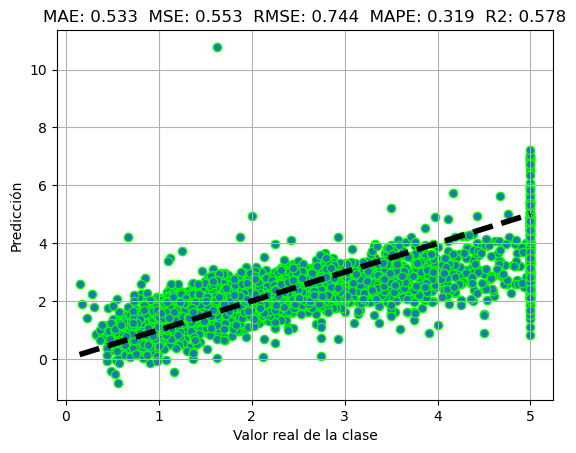

In [19]:
# Gráfica de realidad vs. predicción.
fig, ax = plt.subplots()
ax.scatter(y_testing, y_pred_test, edgecolors=(0, 1, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Valor real de la clase')
ax.set_ylabel('Predicción')
plt.title("MAE: %.3f  MSE: %.3f  RMSE: %.3f  MAPE: %.3f  R2: %.3f" %
          (MAE,MSE,RMSE,MAPE,R2))
plt.grid()
plt.show()

In [20]:
def report_regression_graphics(y_true, y_pred):
    fig, ax = plt.subplots(2,1)

    # Plot linear fit
    ax[0].scatter(y_true, y_pred)
    ax[0].set_ylabel('y_pred')
    ax[0].set_title('Regression line')
    ax[0].grid()
    # overlay the regression line
    z = np.polyfit(np.float64(y_true), y_pred, 1)
    p = np.poly1d(z)
    ax[0].plot(y_true, p(y_true), color='magenta')

    # Plot bisectriz
    ax[1].scatter(y_true, y_pred, edgecolors=(0, 0, 0))
    ax[1].set_xlabel('y_true')
    ax[1].set_ylabel('y_pred')
    ax[1].set_title('Bisector')
    ax[1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax[1].grid()

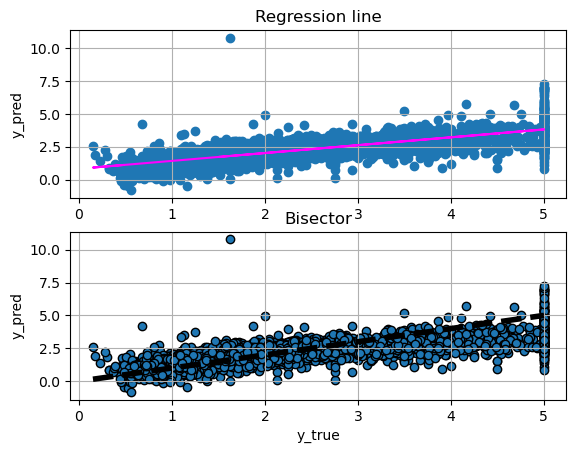

In [24]:
report_regression_graphics(y_testing, y_pred_test)